In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Wczytanie danych

In [2]:
shp_world = gpd.read_file('../data/world_countries/World_Countries__Generalized_.shp')
shp_world

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.7439 -14.37555, -170.74942 -14...."
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."
...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ..."
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137..."
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096..."


In [3]:
shark_attacks_data = pd.read_csv('../data/Shark attacks and fatalities - Global Shark Attack File (GSAF) (2018) .csv')
shark_attacks_data

,Entity,Year,Total number of shark attacks (GSAF (2018)),Total number of shark attack fatalities (GSAF (2018))
0,Admiralty Islands,1962,1,0
1,Algeria,1844,1,1
2,American Samoa,1954,1,1
3,American Samoa,1955,1,1
4,American Samoa,1958,1,1
...,...,...,...,...
2013,Yemen,1897,1,1
2014,Yemen,1898,3,3
2015,Yemen,1906,1,0
2016,Yemen,1955,1,1


# Przygotowanie danych

## Pogrupowanie liczby ataków rekinów po państwach

In [4]:
data = shark_attacks_data.groupby('Entity')['Total number of shark attacks (GSAF (2018))'].count().reset_index()
data

,Entity,Total number of shark attacks (GSAF (2018))
0,Admiralty Islands,1
1,Algeria,1
2,American Samoa,3
3,Andaman Islands,1
4,Andaman and Nicobar Islands,1
...,...,...
179,Venezuela,9
180,Vietnam,6
181,West Indies,2
182,World,236


## Dopasowanie nazw krajów w shapefie do nazw krajów w danych o atakach rekinów

In [5]:
countries_not_in_shp = set(data['Entity']) - set(shp_world['COUNTRY'])
countries_not_in_shp

{'Admiralty Islands',
 'Andaman Islands',
 'Andaman and Nicobar Islands',
 'Antigua (Antigua and Barbuda)',
 'Asia',
 'Atlantic Ocean',
 'Bahrein',
 'Bay Of Bengal',
 'British Isles',
 'British New Guinea',
 'British West Indies',
 'Cape Verde',
 'Caribbean Sea',
 'Central Pacific',
 'Ceylon (Sri Lanka)',
 'Coast Of Africa',
 'Crete (Greece)',
 'Diego Garcia (Chagos Archipelago)',
 'Egypt / Israel',
 'England',
 'Equatorial Guinea / Cameroon',
 'Grand Cayman (Cayman Islands)',
 'Gulf Of Aden',
 'Hong Kong',
 'Indian Ocean',
 'Iran / Iraq',
 'Java (Indonesia)',
 'Johnston Island',
 'Korea',
 'Mediterranean Sea',
 'Mid Atlantic Ocean',
 'Mid-Pacifc Ocean',
 'Netherlands Antilles',
 'New Britain (Papua New Guinea)',
 'New Guinea',
 'North Atlantic Ocean',
 'North Pacific Ocean',
 'North Sea',
 'Northern Arabian Sea',
 'Ocean',
 'Okinawa (Japan)',
 'Pacific Ocean',
 'Palestine',
 'Persian Gulf',
 'Red Sea',
 'Red Sea / Indian Ocean',
 'Reunion',
 'Roatan (Honduras)',
 'Russia',
 'Saint Mar

In [6]:
shp_world[shp_world['COUNTRY']=='Turkiye']

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
230,231,Turkiye,TR,Turkiye,TR,76.990731,81.199325,"MULTIPOLYGON (((26.66972 39.55499, 26.65945 39..."


In [7]:
country_mapper = {
    'Admiralty Islands': 'Papua New Guinea',
    'Andaman Islands': 'India',
    'Andaman and Nicobar Islands': 'India',
    'Antigua (Antigua and Barbuda)': 'Antigua and Barbuda',
    'Bahrein': 'Bahrain',
    'British Isles': 'United Kingdom',
    'British New Guinea': 'Papua New Guinea',
    'Cape Verde': 'Cabo Verde',
    'Ceylon (Sri Lanka)': 'Sri Lanka',
    'Crete (Greece)': 'Greece',
    'Diego Garcia (Chagos Archipelago)': 'British Indian Ocean Territory',
    'England': 'United Kingdom',
    'Grand Cayman (Cayman Islands)': 'Cayman Islands',
    'Hong Kong': 'China',
    'Java (Indonesia)': 'Indonesia',
    'Johnston Island': 'United States of America',
    'Korea': 'South Korea',
    'Netherlands Antilles': 'Curacao',
    'New Britain (Papua New Guinea)': 'Papua New Guinea',
    'New Guinea': 'Papua New Guinea',
    'Okinawa (Japan)': 'Japan',
    'Palestine': 'Israel',
    'Reunion': 'Réunion',
    'Roatan (Honduras)': 'Honduras',
    'Russia': 'Russian Federation',
    'Saint Martin (French part)': 'Saint Martin',
    'Santo Domingo (Dominican Republic)': 'Dominican Republic',
    'Scotland': 'United Kingdom',
    'Sint Maarten (Dutch part)': 'Sint Maarten',
    'Taiwan': 'China',
    'The Azores (Portugal)': 'Portugal',
    'Tobago (Trinidad and Tobago)': 'Trinidad and Tobago',
    'Turkey': 'Turkiye',
}

In [8]:
data['Entity'] = data['Entity'].replace(country_mapper)
data['Entity']

0      Papua New Guinea
1               Algeria
2        American Samoa
3                 India
4                 India
             ...       
179           Venezuela
180             Vietnam
181         West Indies
182               World
183               Yemen
Name: Entity, Length: 184, dtype: object

In [9]:
data = data.rename(columns={'Entity': 'COUNTRY', 'Total number of shark attacks (GSAF (2018))': 'shark_attacks_count'})
data

,COUNTRY,shark_attacks_count
0,Papua New Guinea,1
1,Algeria,1
2,American Samoa,3
3,India,1
4,India,1
...,...,...
179,Venezuela,9
180,Vietnam,6
181,West Indies,2
182,World,236


## Połączenie zbiorów

In [10]:
shp_world = shp_world.merge(data, how='left', on='COUNTRY')
shp_world['shark_attacks_count'] = shp_world['shark_attacks_count']
shp_world

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,shark_attacks_count
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",NaN
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569...",NaN
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...",1.0
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.7439 -14.37555, -170.74942 -14....",3.0
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ...",NaN
...,...,...,...,...,...,...,...,...,...
268,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ...",6.0
269,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137...",NaN
270,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13...",6.0
271,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096...",NaN


In [11]:
shp_world['geometry'].type

0           Polygon
1           Polygon
2           Polygon
3           Polygon
4           Polygon
           ...     
268    MultiPolygon
269    MultiPolygon
270    MultiPolygon
271         Polygon
272         Polygon
Length: 273, dtype: object

In [12]:
print(shp_world['geometry'].crs)

EPSG:4326


## Zmiana geometrii danych

In [13]:
shp_world['geometry'] = shp_world['geometry'].to_crs({'proj': 'cea'})
shp_world

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,shark_attacks_count
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((6821274.81 3694248.004, 6823482.06 3...",NaN
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((2178614.504 4221649.22, 2179852.165 ...",NaN
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((512443.03 3808984.977, 516027.527 38...",1.0
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-19007124.005 -1573374.351, -1900773...",3.0
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((160949.743 4297258.651, 165479.439 4...",NaN
...,...,...,...,...,...,...,...,...,...
268,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((11919975.671 1864444.092, 1192...",6.0
269,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-19821639.593 -1567835.314, -1...",NaN
270,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((5260340.777 1491739.909, 52508...",6.0
271,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((3363297.789 -1638268.289, 3363981.86...",NaN


## Dodanie potrzebnych kolumn

In [14]:
shp_world['SHAPE_Area'] = shp_world['geometry'].area / 10**6
shp_world['SHAPE_Leng'] = shp_world['geometry'].length / 1000
shp_world['country_name_len'] = shp_world['COUNTRY'].apply(lambda x: len(x))
shp_world

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,shark_attacks_count,country_name_len
0,1,Afghanistan,AF,Afghanistan,AF,5301.331428,6.419074e+05,"POLYGON ((6821274.81 3694248.004, 6823482.06 3...",NaN,11
1,2,Albania,AL,Albania,AL,930.080165,2.865394e+04,"POLYGON ((2178614.504 4221649.22, 2179852.165 ...",NaN,7
2,3,Algeria,DZ,Algeria,DZ,7464.227480,2.317515e+06,"POLYGON ((512443.03 3808984.977, 516027.527 38...",1.0,7
3,4,American Samoa,AS,United States,US,66.260013,1.637721e+02,"POLYGON ((-19007124.005 -1573374.351, -1900773...",3.0,14
4,5,Andorra,AD,Andorra,AD,95.723830,5.071533e+02,"POLYGON ((160949.743 4297258.651, 165479.439 4...",NaN,7
...,...,...,...,...,...,...,...,...,...,...
268,247,Vietnam,VN,Viet Nam,VN,7273.501855,3.242782e+05,"MULTIPOLYGON (((11919975.671 1864444.092, 1192...",6.0,7
269,248,Wallis and Futuna,WF,France,FR,76.608183,1.604782e+02,"MULTIPOLYGON (((-19821639.593 -1567835.314, -1...",NaN,17
270,249,Yemen,YE,Yemen,YE,3727.096719,4.535719e+05,"MULTIPOLYGON (((5260340.777 1491739.909, 52508...",6.0,5
271,250,Zambia,ZM,Zambia,ZM,5390.278333,7.519176e+05,"POLYGON ((3363297.789 -1638268.289, 3363981.86...",NaN,6


In [15]:
shp_world['shark_attacks_per_border_1000_km'] = shp_world['shark_attacks_count'] / shp_world['SHAPE_Leng'] * 1000
shp_world['shark_attacks_per_100k_km2'] = shp_world['shark_attacks_count'] / shp_world['SHAPE_Area'] * 100_000
shp_world['shark_attacks_per_name_len'] = shp_world['shark_attacks_count'] / shp_world['country_name_len']

# Wizualizacja

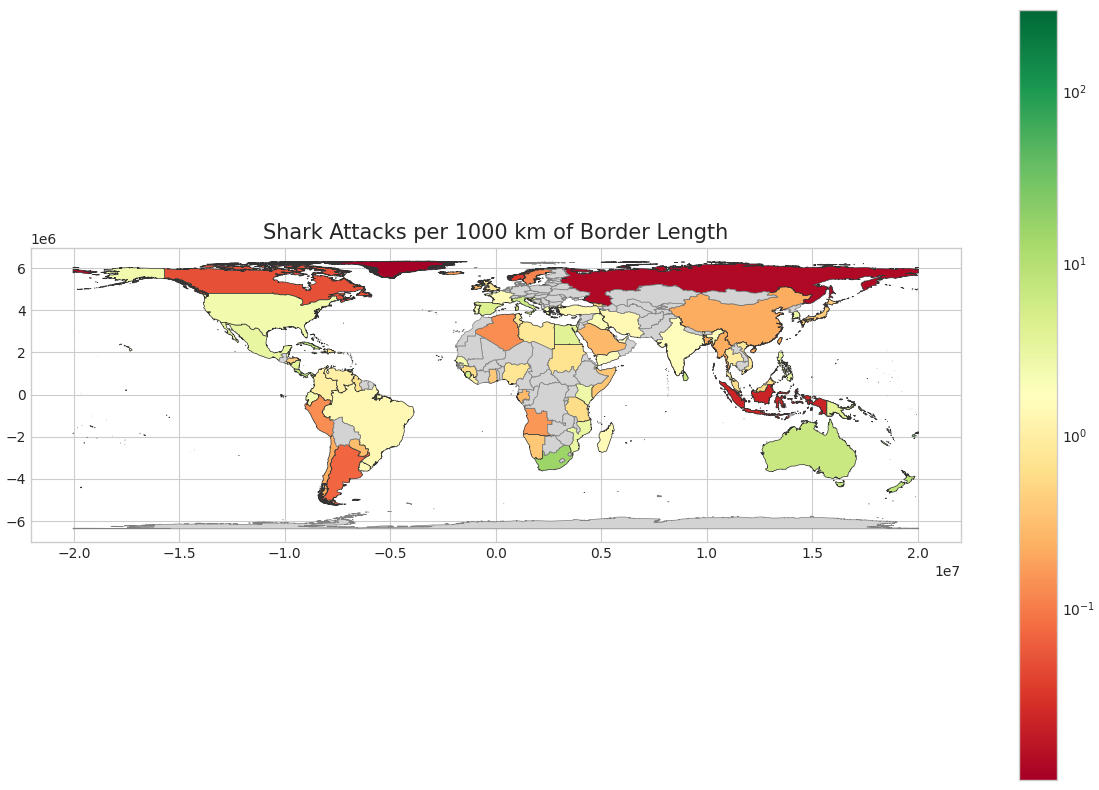

In [16]:
with plt.style.context('seaborn-v0_8-whitegrid'):
    fig, ax = plt.subplots(1, figsize=(15, 10))

    ax.set_title('Shark Attacks per 1000 km of Border Length', fontdict={'fontsize': '15', 'fontweight' : '3'})

    fig = shp_world.plot(column='shark_attacks_per_border_1000_km', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True,
                         norm=colors.LogNorm(
                            vmin=shp_world['shark_attacks_per_border_1000_km'].replace(0, np.nan).min(),
                            vmax=shp_world['shark_attacks_per_border_1000_km'].max()
                        ),
                         missing_kwds={
                             "color": "lightgrey",
                             "edgecolor": "grey",
                            #  "hatch": "///",
                             "label": "Missing values",
                         })
    
    plt.savefig('../maps/shark_attacks_per_border_1000_km.png', dpi=600, bbox_inches='tight')

In [17]:
with plt.style.context('seaborn-v0_8-whitegrid'):
    fig, ax = plt.subplots(1, figsize=(15, 10))

    ax.set_title('Shark Attacks per 100k km²', fontdict={'fontsize': '15', 'fontweight' : '3'})

    fig = shp_world.plot(column='shark_attacks_per_100k_km2', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True,
                         norm=colors.LogNorm(
                            vmin=shp_world['shark_attacks_per_100k_km2'].replace(0, np.nan).min(),
                            vmax=shp_world['shark_attacks_per_100k_km2'].max()
                        ),
                         missing_kwds={
                             "color": "lightgrey",
                             "edgecolor": "grey",
                            #  "hatch": "///",
                             "label": "Missing values",
                         })
    
    plt.savefig('../maps/shark_attacks_per_100k_km2.png', dpi=600, bbox_inches='tight')

In [18]:
with plt.style.context('seaborn-v0_8-whitegrid'):
    fig, ax = plt.subplots(1, figsize=(15, 10))

    ax.set_title('Shark Attacks per country name length', fontdict={'fontsize': '15', 'fontweight' : '3'})

    fig = shp_world.plot(column='shark_attacks_per_name_len', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True,
                         norm=colors.LogNorm(
                            vmin=shp_world['shark_attacks_per_name_len'].replace(0, np.nan).min(),
                            vmax=shp_world['shark_attacks_per_name_len'].max()
                        ),
                         missing_kwds={
                             "color": "lightgrey",
                             "edgecolor": "grey",
                            #  "hatch": "///",
                             "label": "Missing values",
                         })
    
    plt.savefig('../maps/shark_attacks_per_name_len.png', dpi=600, bbox_inches='tight')